In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from datetime import datetime
from scipy import stats
import copy
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import TomekLinks
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split, KFold

In [2]:
cc_fraud = pd.read_csv("creditcard.csv");

In [3]:
cc_fraud.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [4]:
cc_fraud.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
cc_fraud['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

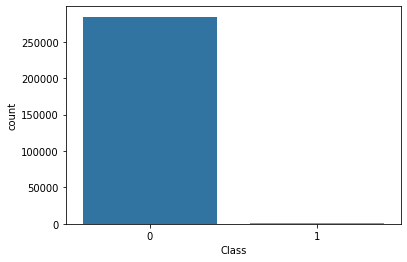

In [6]:
sns.countplot(x = 'Class', data = cc_fraud)

In [7]:
cc_fraud.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [8]:
X = cc_fraud.iloc[:, 1:29]

In [9]:
y = cc_fraud.loc[:, 'Class']

In [10]:
y.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1) 

In [12]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [13]:
log = LogisticRegression()
log.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
y_pred = log.predict(X_test)

In [15]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[85293    15]
 [   57    78]]


0.9991573329588147

So, first thing to note is how high the accuracy score is. This seems good, but this is a frequent problem with imbalanced datasets on display. It is easy to get a high score when there is so little of one class. If the model predicts 100 percent of classes as being 0 when only 99 percent are, there is a high accuracy but the model does nothing to inform us when the minoirty class is present. Often times with imbalanced classes we are more concerned with the minority class than the majority, so that model would not be helpful

To help with this problem there are numerous alternative metrics:

Precision is equal TP / TP + FP, where TP are the true positive cases and FP is the false positive cases. Put another way, it is the number of cases that are correctly identified as positive instances over the total number of cases that are predicted to be positive. 

Recall is equal to TP / TP + FN, where FN are the false negative cases. Put another way, recall is the number of cases that are correctly identified as positive over the total number of positive cases.

There is often a tradeoff between precision and recall. One might decide to increase or decrease the threshold for which the model predicts a positive case. If the model moves from .5 to .6, for example, then the model will predict fewer positive cases and thus precision will increase as FP decreases. This will have the added effect of decreasing recall the false negatives will increase as cases that are actually positive will be identified as negative.

The F1 Score is 2((precision*recall) / (precision / recall)). It seeks to balance the precision and recall in one metric.

I can access these metrics with classification_report from sklearn.metrics.

In [16]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00     85308\n           1       0.84      0.58      0.68       135\n\n    accuracy                           1.00     85443\n   macro avg       0.92      0.79      0.84     85443\nweighted avg       1.00      1.00      1.00     85443\n'

So, precision is alright, while the recall is very poor at .58. Recall measures the preidicted positive cases over all positive cases. I would say with credit card fraud the effect of predicting a false negative is worse than predicting a false positive, so recall is probably the best metric.

In [17]:
from sklearn import metrics
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import recall_score, precision_score, f1_score

In [18]:
logRecall = recall_score(y_test, y_pred)

The following line of code tracks the precision and recall as the threshold is altered.

In [19]:
y_probs = log.predict_proba(X_test)

In [20]:
precision, recall, thresholds = precision_recall_curve(y_test, y_probs[:, 1])

(0, 1)

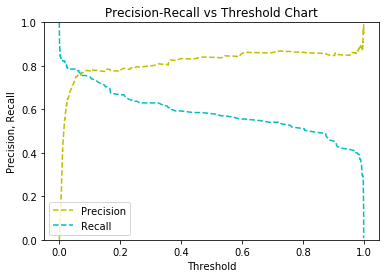

In [21]:
plt.title("Precision-Recall vs Threshold Chart")
plt.plot(thresholds, precision[: -1], "y--", label="Precision")
plt.plot(thresholds, recall[: -1], "c--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
plt.ylim([0,1])

In [22]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [23]:
log = LogisticRegression()
log.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
thresholds = [.01, .03, .05, .1, .15, .2, .3, .4, .5, .6, .7]

In [25]:
threshold = .1

In [26]:
pred = np.where(log.predict_proba(X_test)[:,1] > threshold, 1, 0)

In [27]:
recall_score(y_test, pred)

0.7481481481481481

In [28]:
p = pd.DataFrame()
for i in thresholds:
    pred = np.where(log.predict_proba(X_test)[:,1] > i, 1, 0)
    t = pd.DataFrame(data = {"threshold": [i], "accuracy": [accuracy_score(y_test, pred)], "recall": [recall_score(y_test, pred)],
                   "precision":[precision_score(y_test, pred)]})
    p = p.append(t)

In [29]:
p

,threshold,accuracy,recall,precision
0,0.01,0.997577,0.829630,0.378378
0,0.03,0.999017,0.785185,0.658385
0,0.05,0.999216,0.785185,0.736111
0,0.10,0.999263,0.748148,0.776923
0,0.15,0.999204,0.703704,0.772358
0,0.20,0.999169,0.666667,0.775862
0,0.30,0.999169,0.629630,0.801887
0,0.40,0.999157,0.585185,0.831579
0,0.50,0.999157,0.577778,0.838710
0,0.60,0.999157,0.555556,0.862069


As previously mentioned there is a clear tradeoff between recall and precision. A threshold that would lead to a relatively high score on both metrics would be around ..04. Perhaps resampling can improve this.

## Balancing Datasets

### Near-Miss Technique

There are two main ways in which to deal with imbalanced datasets. The first is through undersampling, and the other is oversampling. I will look at undersampling first. Undersampling involves selective filtering out certain values in the class which has the majority of instances. I will use the lmblearn library.

Before importing I had to conda install by going to the anaconda prompt: conda install -c conda-forge imbalanced-learn

The first kind of undersampling is the near-miss technique. This technique involves only keeping the majority class samples based off their distance from some data points of the minority class. It is similar to the K nearest neighbour technique used in classification problems. In this algorithm, data points are assigned a class based off the classes of the nearest data points. 

There are three different types: Near-miss 1, Near-miss 2 and Near-miss 3. The Near-miss 1 algorithm only keeps the points from the majority class that are closest to the average of a given number of the closest minority class points. 

The Near-miss 2 model keeps the points from the majority class that are farthest frm the average of a certain number of minority class points. 

The Near-miss 3 model first finds the k nearest neighbours of each instance of a minority class. It keeps the majority class points that have the smallest average distance to those nearest neighbours. 

For near miss 1 and 2 the number of minority class points for which the average is calculated is a hyperparameter, which can be tuned. 

I will use the imblearn library for resampling techniques. The first argument for under_sampling. NearMiss is sampling strategy. This argument specifies either the ratio of desired samples of the miniority class over the number of desired samples of the majority class or the target class to be resampled. This can be the majority class, all samples but the minority class and all samples but majority. The version argument specifies whether it is 1, 2 or 3. Finally, the n_neighbors argument specifies, in the case of nearmiss 3, the number of nearest neighbours for minority class.

In [30]:
from imblearn.under_sampling import NearMiss
nm = NearMiss()

Steps:
I want to split dataset into two parts. Then, I undersample with train. After I will see how it does on test set. 

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1) 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

I want to iterate over all possible models for near miss, while varying the number of neighbours to average when finding the farthest away minority class.

In [32]:
nearmiss = pd.DataFrame(columns = ["Model", "n_neighbors", "TP", "TN", "FP", "FN", "Precision", "Recall"])
for i in range(1, 4):
    for j in range(1, 6):
        nm = NearMiss(version = i, n_neighbors = j)
        X_train, y_train = nm.fit_resample(X_train, y_train)
        print("size of training set for model " + str(i) + " neighbours " + str(j) + ":  " + str(len(X_train)))
        log = LogisticRegression()
        log.fit(X_train, y_train)
        y_pred = log.predict(X_test)
        cm = confusion_matrix(y_test, y_pred)
        model = pd.DataFrame(data = {"Model": ["NearMiss" + str(i)], "n_neighbors": [str(j)]})
        metrics = pd.DataFrame(data = {"TP": [cm[0][0]], "TN": [cm[1][1]], "FP": [cm[0][1]], "FN": [cm[1][0]]})
        prec_rec = pd.DataFrame(data = {"Precision": [precision_score(y_test, y_pred)], "Recall": [recall_score(y_test, y_pred)], "f1Score": [f1_score(y_test, y_pred)]})
        undersamples = pd.concat([model, metrics, prec_rec], axis = 1)
        nearmiss = nearmiss.append(undersamples, ignore_index = True)

size of training set for model 1 neighbours 1:  714
size of training set for model 1 neighbours 2:  714
size of training set for model 1 neighbours 3:  714
size of training set for model 1 neighbours 4:  714
size of training set for model 1 neighbours 5:  714
size of training set for model 2 neighbours 1:  714
size of training set for model 2 neighbours 2:  714
size of training set for model 2 neighbours 3:  714
size of training set for model 2 neighbours 4:  714
size of training set for model 2 neighbours 5:  714


C:\Users\pruss\anaconda3\envs\pandas_playground\lib\site-packages\imblearn\under_sampling\_prototype_selection\_nearmiss.py:174: UserWarning: The number of the samples to be selected is larger than the number of samples available. The balancing ratio cannot be ensure and all samples will be returned.
  warnings.warn(


size of training set for model 3 neighbours 1:  387
size of training set for model 3 neighbours 2:  60


C:\Users\pruss\anaconda3\envs\pandas_playground\lib\site-packages\imblearn\under_sampling\_prototype_selection\_nearmiss.py:174: UserWarning: The number of the samples to be selected is larger than the number of samples available. The balancing ratio cannot be ensure and all samples will be returned.
  warnings.warn(


size of training set for model 3 neighbours 3:  47
size of training set for model 3 neighbours 4:  34


C:\Users\pruss\anaconda3\envs\pandas_playground\lib\site-packages\imblearn\under_sampling\_prototype_selection\_nearmiss.py:174: UserWarning: The number of the samples to be selected is larger than the number of samples available. The balancing ratio cannot be ensure and all samples will be returned.
  warnings.warn(


size of training set for model 3 neighbours 5:  33


The size of the training set decreases with nearmiss3. The nearest neighbours approach reduces the available minority samples. This has the effect of greatly reducing the recall. The precision is very low for nearmiss for all 3 models. The recall is very high in models 1 and 2, but again precision is very low. As well, the f1score, which seeks to balance the two scores is very low. In sum there does not appear to be a successful application of the nearmiss algorithm. This is likely due to the low number of minority samples. I'll try one more undersampling technique.

In [33]:
nearmiss['positive instances'] = nearmiss['TP'] + nearmiss['FN']
nearmiss['negative instances'] = nearmiss['TN'] + nearmiss['FP']
nearmiss['total instances'] = nearmiss['positive instances'] + nearmiss['negative instances']
nearmiss

,Model,n_neighbors,TP,TN,FP,FN,Precision,Recall,f1Score,positive instances,negative instances,total instances
0,NearMiss1,1,58029,127,27279,8,0.004634,0.940741,0.009223,58037,27406,85443
1,NearMiss1,2,58029,127,27279,8,0.004634,0.940741,0.009223,58037,27406,85443
2,NearMiss1,3,58029,127,27279,8,0.004634,0.940741,0.009223,58037,27406,85443
3,NearMiss1,4,58029,127,27279,8,0.004634,0.940741,0.009223,58037,27406,85443
4,NearMiss1,5,58029,127,27279,8,0.004634,0.940741,0.009223,58037,27406,85443
5,NearMiss2,1,58029,127,27279,8,0.004634,0.940741,0.009223,58037,27406,85443
6,NearMiss2,2,58029,127,27279,8,0.004634,0.940741,0.009223,58037,27406,85443
7,NearMiss2,3,58029,127,27279,8,0.004634,0.940741,0.009223,58037,27406,85443
8,NearMiss2,4,58029,127,27279,8,0.004634,0.940741,0.009223,58037,27406,85443
9,NearMiss2,5,58029,127,27279,8,0.004634,0.940741,0.009223,58037,27406,85443


In [34]:
nr12 = pd.concat([nearmiss.iloc[[0], :], nearmiss.iloc[[7], :]], axis = 0)

In [35]:
nearmissRecall = nearmiss.iloc[0, 7]

In [36]:
nearmissRecall

0.9407407407407408

## Tomek's link


In Tomek's link, the algorithm seeks out the data points that have the other class as a nearest neighbour. It then eliminates points based off their class. For instance, it will remove either the majority class or both instances of the classes. The aim of this algorithm is to more clearly demarcate the division between classes. 

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1) 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [91]:
tl = TomekLinks()
X_train, y_train = tl.fit_resample(X_train, y_train)
log = LogisticRegression(random_state = 3)
log.fit(X_train, y_train)
y_pred = log.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

HELLO
FROM
THE
OTHER
SIDE


In [92]:
cm

array([[85293,    15],
       [   56,    79]], dtype=int64)

In [93]:
print(recall_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

0.5851851851851851
0.8404255319148937
0.6899563318777293


In [94]:
Tomek  = recall_score(y_test, y_pred)

So the undersampling techniques seem to improve the recall at the cost of other scores. The scores are so low that the increase in recall (which may be the most important metric) probably isn't worth it.

## Oversampling

### SMOTE

SMOTE involves creating synthetic points closely related to already present datapoints. Smote, which stands for Synthetic Minority Oversampling Technique, works by finding the nearest neighbour(s) of each minority class. It then takes the vector between both data points and multiplies by some number between 0 and 1. This sets the location for the new synthetic data point. Repeat this process k number of times, k being determined by how many nearest neighbours of each data point specified as argument.

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1) 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [38]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

In [39]:
lr1 = LogisticRegression() 
lr1.fit(X_train_res, y_train_res.ravel()) 
predictions = lr1.predict(X_test)

In [40]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85308
           1       0.07      0.90      0.13       135

    accuracy                           0.98     85443
   macro avg       0.53      0.94      0.56     85443
weighted avg       1.00      0.98      0.99     85443



In [41]:
smote = recall_score(y_test, predictions)

Similar to the undersampling methods, recall is increased and precision is decreased substantially.

I next want to test out cross validation and grid search. With oversampling, the danger is overfitting as it involves creating points based off original data. In cross validation, I split the training set into 5 subsets. From there, I take 4 subsets and train data on those 4, and test on the last subset. I do this 4 times and have each subset take its turn as the validation set. I also test each training set on the test set to see if the validation scores correlate with test sets.

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1) 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [43]:
recall = []
precision = []
f1 = []
accuracy = []
test_recall = []

In [44]:
kf = KFold(n_splits = 5)

In [45]:
bestRecall = 0
for train_index_ls, validation_index_ls in kf.split(X_train, y_train):
    # keeping validation set apart and oversampling in each iteration using smote 
    train, validation = X_train[train_index_ls], X_train[validation_index_ls]
    target_train, target_val = y_train.iloc[train_index_ls], y_train.iloc[validation_index_ls]
    sm = SMOTE(random_state= 2)
    X_train_res, y_train_res = sm.fit_sample(train, target_train)
    log = LogisticRegression(random_state=2)
    log.fit(X_train_res, y_train_res)
    validation_preds = log.predict(validation)
    if(recall_score(target_val, validation_preds) > bestRecall):
        bestRecall = recall_score(target_val, validation_preds)
        bestLog = log
    recall.append(recall_score(target_val, validation_preds))
    precision.append(precision_score(target_val, validation_preds))
    accuracy.append(accuracy_score(target_val, validation_preds))
    test_recall.append(recall_score(y_test, log.predict(X_test)))
    f1.append(f1_score(target_val, validation_preds))

In [46]:
bestRecall

0.9242424242424242

In [47]:
test_recall

[0.8888888888888888,
 0.8962962962962963,
 0.8888888888888888,
 0.9111111111111111,
 0.8740740740740741]

In [48]:
y_pred = bestLog.predict(X_test)

In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85308
           1       0.07      0.87      0.12       135

    accuracy                           0.98     85443
   macro avg       0.53      0.93      0.56     85443
weighted avg       1.00      0.98      0.99     85443



In [50]:
recall

[0.9178082191780822,
 0.8472222222222222,
 0.9230769230769231,
 0.9117647058823529,
 0.9242424242424242]

In [51]:
SmoteCV = np.mean(recall)

In [52]:
SmoteTest = np.mean(test_recall)

In [53]:
SmoteTest

0.8918518518518518

In [54]:
SmoteCV

0.9048228989204009

In [55]:
SmoteTestHigh = max(test_recall)

In [56]:
SmoteTestHigh

0.9111111111111111

So there is very little difference in the cross validation scores and the test scores based off the models from cross validation. This is good as it shows there is no overfitting occurring. The interesting part is that the model with the highest validation score is the model with the worst test score, although it is marginal.

## Grid Search

There are numerous hyperparameters found in different algorithms used to predict outcomes, whether the model is found by random forest or logistic regression etc. In the case of logisitic regression, regularization is a hyperparameter. Grid search is used to check across a series of possible values for these hyperparameters and find the highest validation score from those combinations.

In regularization, there is a penalty term that reduces the importance of certain parameters. The degree to which their importance is reduced is determined by a loss function. The parameters are altered so that the loss function is minimized. The motivation behind regularization is dealing with overfitting. If a model is too well-suited for a set of data, then it may not be suitable for similar yet different data. Regularization works because it introduces a variable that is independent of the data being modeled and thus the creation of the model will be less prone to overfitting. Up to a certain point it reduces the variance substantially, while only incrementing the bias. 

There are two kinds of regularization: Lasso, or L1, and Ridge, or L2. The main practical difference between the two is that lasso can reduce features to a weight of 0, while ridge does not. This allows Lasso to function as a type of feature selection.
With grid search, one can test both types of regularizations and with multiple penalty terms. 

The higher the penalty term, the more variables will be shrunk by. When specifying the degree of penalty in Python, we use the 'C' argument, which is the inverse of the penalty term. This means a higher 'C' equates to less shrinkage and a lower C means higher shrinkage.

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1) 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [58]:
kf = KFold(n_splits = 5)

In [59]:
log = LogisticRegression(random_state=30)

In [60]:
from imblearn.pipeline import make_pipeline, Pipeline

In [61]:
pipe = Pipeline([('classifier' , LogisticRegression())])

In [62]:
param_grid = [
    {'classifier' : [LogisticRegression()],
     'classifier__penalty' : ['l1', 'l2'],
    'classifier__C' : np.logspace(-4, 4, 20),
    'classifier__solver' : ['liblinear']}]

In [63]:
LogCV = GridSearchCV(pipe, scoring = 'recall', param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)

In [64]:
best_LOGcv = LogCV.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   16.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  4.6min finished


In [65]:
logGridSearch = best_LOGcv.best_score_

In [66]:
best_LOGcv.best_params_

{'classifier': LogisticRegression(C=1.623776739188721, class_weight=None, dual=False,
                    fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                    max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                    warm_start=False),
 'classifier__C': 1.623776739188721,
 'classifier__penalty': 'l2',
 'classifier__solver': 'liblinear'}

In [67]:
logGridSearch

0.6357981220657277

So the model with the best recall score uses ridge regression and a C value of 1.62378. Grid search increases recall, but there clearly needs to be some resampling.

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1) 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [71]:
logreg2=LogisticRegression(C= 1.623777, solver = 'liblinear', penalty="l2")
logreg2.fit(X_train,y_train)
y_pred = logreg2.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
log2Recall = recall_score(y_test, y_pred)

In [72]:
log2Recall

0.5777777777777777

So with cross validation, the test recall actually goes down, despite a validation score that is higher than the original test score

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1) 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [74]:
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

In [75]:
kf = KFold(n_splits = 5)

In [76]:
log = LogisticRegression(random_state=30)

In [77]:
pipe = Pipeline([('classifier' , LogisticRegression())])

In [78]:
param_grid = [
    {'classifier' : [LogisticRegression()],
     'classifier__penalty' : ['l1', 'l2'],
    'classifier__C' : np.logspace(-4, 4, 20),
    'classifier__solver' : ['liblinear']}]

In [79]:
smote_grid = GridSearchCV(pipe, scoring = 'recall', param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)

In [81]:
best_smote = smote_grid.fit(X_train_res, y_train_res)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   35.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  5.5min finished


In [82]:
smote_grid_search = best_smote.best_score_

In [83]:
smote_grid_search

0.9212992423347055

In [84]:
best_smote.best_params_

{'classifier': LogisticRegression(C=4.281332398719396, class_weight=None, dual=False,
                    fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                    max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                    warm_start=False),
 'classifier__C': 4.281332398719396,
 'classifier__penalty': 'l2',
 'classifier__solver': 'liblinear'}

In [85]:
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

In [86]:
logSmote=LogisticRegression(C= 4.281332, solver = 'liblinear', penalty="l2")
logreg2.fit(X_train_res,y_train_res)
y_pred = logreg2.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
logSmoteRecall = recall_score(y_test, y_pred)

In [87]:
logSmoteRecall

0.9037037037037037

In [99]:
Tomek = 0.5851851851851851

In [103]:
model_dict = {"unchanged Logistic": [logRecall], "nearMiss Recall": [nearmissRecall], "Tomek Link": [Tomek], "SMOTE with no cross validation": [smote], "SMOTE with cross validation": [SmoteCV], "SMOTE Test Score": [SmoteTestHigh], "Grid Search with Log, Cross-validation, no resampling": [logGridSearch], "SMOTE_grid_search": [smote_grid_search]}

In [104]:
model_scoring = pd.DataFrame.from_dict(model_dict, orient = 'index')

In [105]:
model_scoring.rename(columns = {0: "recall score"}).sort_values(by = 'recall score', ascending = False)

,recall score
nearMiss Recall,0.940741
SMOTE_grid_search,0.921299
SMOTE Test Score,0.911111
SMOTE with cross validation,0.904823
SMOTE with no cross validation,0.903704
"Grid Search with Log, Cross-validation, no resampling",0.635798
Tomek Link,0.585185
unchanged Logistic,0.577778


So nearmiss recall is highest which supports undersampling, however, the other undersampling method had the worst recall other than the original data set. Tomek link barely changed any metrics from the original dataset. The grid search with no resampling had a higher cross validation score than the original dataset's test score. However, when using these optimized hyperparamters the test score was left unchanged. the mean score of cross validation indicated marginal improvement over no cross validation, as did grid search.